In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\Harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Harsh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [5]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [6]:
#rawdata.to_excel('rawdata.xlsx')

# Weekly Global Market Report


<div style="font-size: 17px">
<br>
    <b> Date: </b>  1<sup>st</sup> August, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [80]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [31]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'])

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:


- The market continues to wrestle between the stalled reopening process leading to a moderation in the trajectory of economic improvement and a much better than expected Q2 earnings season so far. In the coming days, investors will also be focused on an additional fiscal package with the current program which expired yesterday.


- Last week the DJIA and S&P 500 fell for the first week in four as technology stocks lost their momentum. This week, several of the biggest FAANG stocks will release their earnings results from the past quarter. We'll also have the upcoming Federal Reserve press conference, and the Chinese PMI announcement, later in the week.

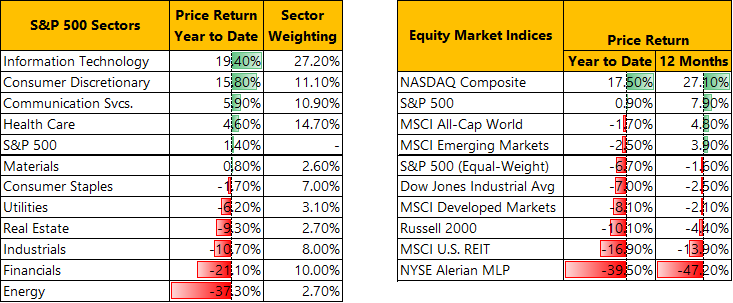

- The major indexes ended mostly higher for the week, as investors reacted to a flood of quarterly earnings reports and some prominent economic data. Large-caps and growth stocks outperformed, putting at least a temporary end to the rotation into small-caps and value shares over the previous two weeks. 


- Within the S&P 500 Index, real estate investment trusts fared best as longer-term bond yields fell, making their dividends more attractive in comparison. The much larger technology sector was also strong, helped by earnings beats from Apple and chipmakers AMD and Qualcomm. Energy stocks recorded the largest declines, dragged lower by Chevron and ExxonMobil following reports of steep second-quarter losses. Materials shares were also weak.


- The heart of Q2 earnings season is upon us, as 48% of S&P 500 companies have reported already and another 33% of companies will report through the end of next week. So far, results are coming in well above depressed estimates. 83% of companies have beaten on the bottom line (above the 5 year average of 72%), led by Technology, Health Care, and Materials. This has led to aggregate results 11.5% above estimates (well above the 5-year average of 4.7%). 


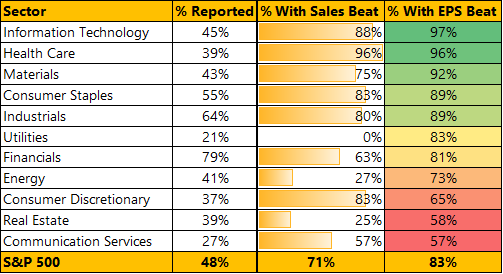

- As a result, full quarter S&P 500 Q2 earnings estimates have risen 6.7% since the start of earnings season with the most positive revisions coming from Health Care, Materials, and Consumer Discretionary sectors. Looking ahead, forward S&P 500 estimates have begun ticking higher. This is a positive development coming out of an expected earnings trough in Q2.

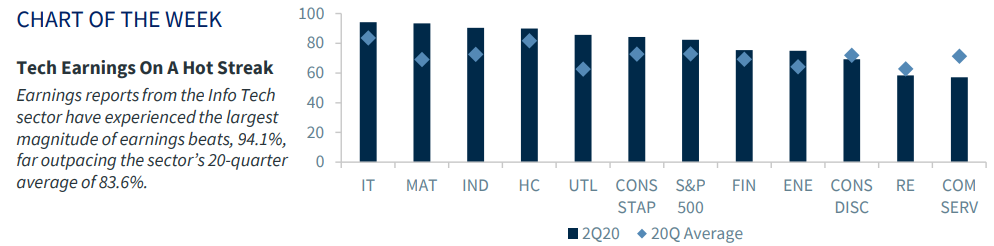

- The semiconductors continue to exhibit one of the best technical trends of all subsectors in the market. This is also a positive indication of economic and overall market momentum. The technical strength is due to fundamental strength through the pandemic. For example, Q2 is expected to be the trough of S&P 500 earnings. While S&P 500 earnings are expected to contract -41% this quarter, the semiconductors are growing their bottom line by 8.9% (best of all industry groups) and estimates are being revised higher.

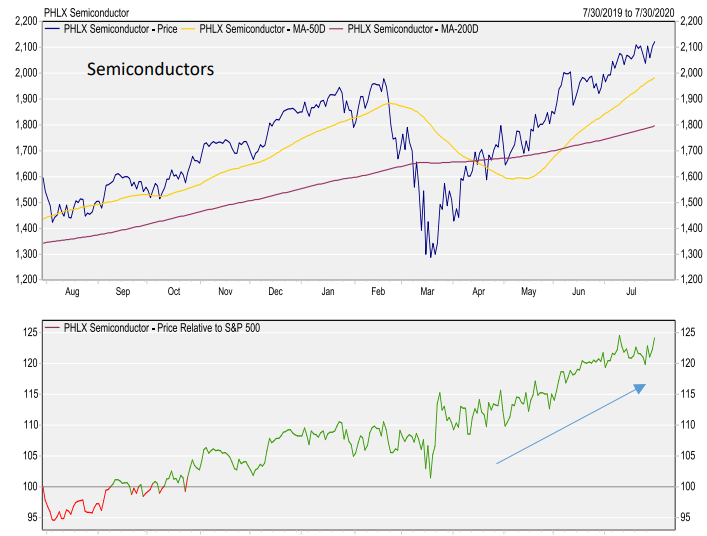

- The week’s economic data seemed to generally weigh on sentiment. The biggest headline was the initial estimate of second-quarter gross domestic product (GDP), which showed the economy contracting at an annualized rate of 32.9%, slightly less than consensus forecasts but by far the largest retrenchment in modern history. 


- The number of Americans seeking unemployment benefits for the first time ticked up for the second straight week—to 1.43 million—and continuing claims rose for the first time in two months. The housing market was a bright spot, with pending home sales rising in June for the first time in four months. The manufacturing sector also seemed to remain on the road to recovery, with durable goods orders expanding by 7.3% in the month, slightly above expectations.


- As shown in the chart below, the weekly earnings of all production and nonsupervisory workers averaged \\$839 in June, while those who lost their jobs were mostly lower wage earners, with an average of \\$692 in weekly wages. The regular pre-pandemic unemployment insurance program pays \\$342 weekly, about half of their salaries, but with the enhancement provided by the government, many have made more than they would have done if they were still employed. While this stimulus has kept consumer spending afloat, it has discouraged some from returning to their jobs, thus adding to the challenges facing employers.

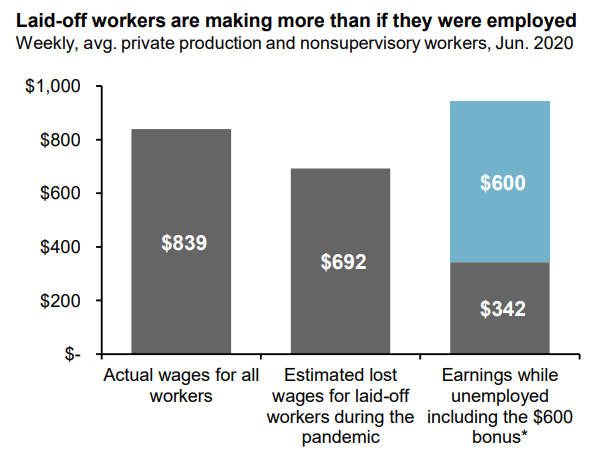
Source: Department of Labor, J.P. Morgan Asset Management. *$342 was average weekly benefit paid in the regular program in May 2020.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

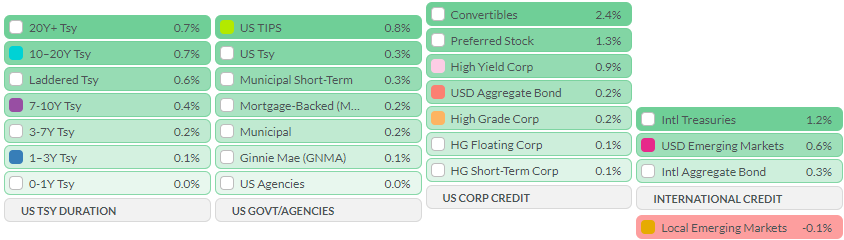

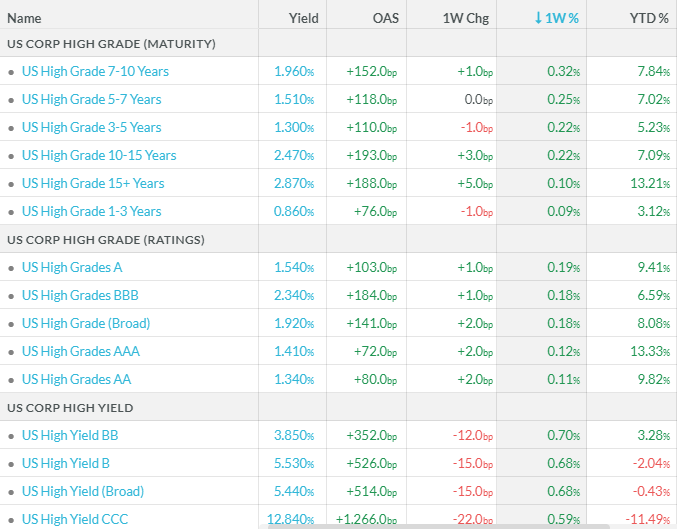

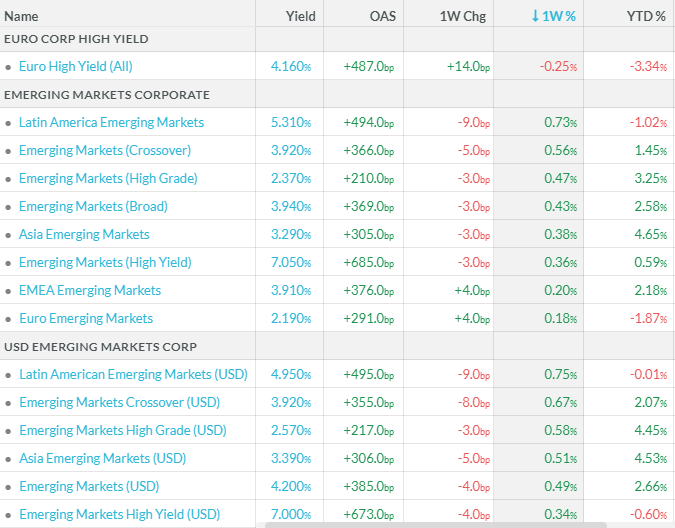

- Federal Open Market Committee members have hinted that a shift in the Fed’s inflation-targeting approach to outcome-based forward guidance may be on the cards. The Fed has a dual mandate of employment and price stability, with the price stability part of the equation currently represented by a 2% core PCE inflation target. 


- However, this target has been more of a guide, as the Fed has raised rates when PCE has been below 2%. Under outcome-based forward guidance, there would be no hiking until inflation moved sustainably above 2%. In fact, only one of the three hiking cycles in the US over the past 25 years would have happened under such a regime. 


- Therefore, the shift could have meaningful repercussions for policy decisions. Not only would it mean that the Fed could remain on hold for a significant period of time, but also that policymakers may need to use further accommodative tools to avoid falling short of their inflation target.

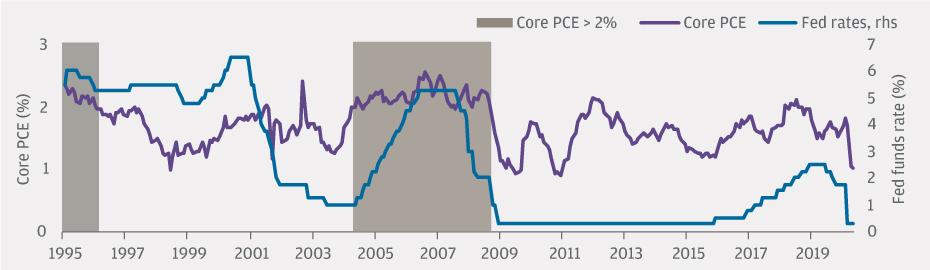
Source: Bloomberg, U.S. Bureau of Economic Analysis, Federal Reserve; data as of 31 May 2020. Core PCE is the core personal consumption expenditures price index – the Fed’s preferred measure of inflation.




- Government bond markets have already been pricing in the expectation that rates will remain low for some time. The US benchmark 10-year government bond yield, which started the year at 1.92%, has fallen meaningfully to 0.58%. For credit markets, a shift to outcome-based forward guidance means we can’t necessarily compare current valuations to historical levels as an indication of fair value. 


- Current spreads for US investment grade and high yield markets, at 140 bps and 529 bps respectively, are both close to longterm averages. These levels may seem relatively meagre given the recessionary backdrop, but could actually present opportunity for further compression under the new regime. (Data as of 28 July 2020).


- The technical implications of a shift to outcome-based forward guidance stem from the potential for rates to stay low for several years. Under such a regime, the search for yield would persist, which may mean that investors continued to look to spread products to generate income. In turn, this could mean that issuers took advantage of strong demand to issue new debt, whether for refinancing or other purposes. 


- The balance would need to be watched carefully, as technicals are currently the main driver of the strong rebound in credit markets. With the Fed being a natural buyer through its corporate purchase programme, further liquidity injections from additional easing measures or an expanded toolbox could bolster demand even more.

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [32]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [33]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [34]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [35]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [36]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

- The FX markets head into August showing a new dynamic, as the dollar downtrend appears to be driven by a new virus-related risk premium and other havens are outperforming. Next week, US jobs data may disappoint, but markets will mostly look for a new hope on the US Phase IV stimulus package. Elsewhere, the BoE and RBA are expected to keep their stance unchanged.


- **USD:** The dollar heads into August under pressure, having seen its largest monthly decline in three years. DXY ended up being lower by almost 1% for the week. The nature of the sell-off suggests a different dynamic is at play. This is not the benign dollar decline we had envisaged, but instead, one seemingly being driven on a new risk premium being inserted into US asset markets on the back of a resurgence in US Covid-19 cases and perhaps as well November's presidential elections starting to make their mark – the dollar did not appreciate President Trump’s suggestion of delaying the November 3rd election.


- The US week ahead will be about jobs and benefits. Markets will be focusing on Congress, where the \\$600 p.m. unemployment benefit boost has now expired and the parties are wrangling over the design of the Phase IV stimulus package. Delays here may upset asset markets, which typically tend to struggle a little more in August. The US data calendar will also see some encouraging ISM numbers, but markets could be more wary about future US lock-downs rather than a modest uptick in business optimism.


- **EUR**: The speed of the EUR/USD rally has surprised everyone and embodies a positive re-assessment of the eurozone project as well as a reconsideration of US risk. Speculators look to have been positioned for the rally, but not for its speed. The need to hold dollars now is less acute, as evidenced by just $107bn being drawn on the Fed’s dollar swap lines versus the peak of \\$450bn in late May. Typically the month of August is slightly friendlier to the dollar, which may generate some consolidation in the 1.17-1.20 range. 


- However, it is a long three months until the US election and with USD hedging costs so cheap, the dollar could stay on the back foot. For the week ahead, we’ll see some German real sector data for June (Industrial Production and Factory Goods data), but the US story might continue to dominate.


- **GBP**: GBP was the best performer this week among G10 currencies, with gains of almost +3\%. The highlight of GBP’s week will be Thursday’s Bank of England meeting. Negative Interest Rate Policy (NIRP) is under ‘active review’ at the BoE, it might be a little too early for the BoE to make any decisive moves here. The BoE might prefer to hold off on the use of NIRP until some clarity emerges on the UK-EU relationship from 2021. 


- Currently money market futures price the bank rate (currently at 0.10\%) moving into negative territory early next year. Also, there are no expectations at this meeting for a change in the BoE’s £745bn Asset Purchase Program (APP) target. Somewhat surprisingly, GBP has managed to out-perform the resurgent EUR and EUR/GBP is threatening to break under 0.90.


- **JPY**: It has been a surprise to see USD/JPY trade under 105, up more than +2\% on the week. Some of Japan’s largest fund managers, including the GPIF, could be using the opportunity to buy US debt securities unhedged – thereby slowing the USD/JPY decline. The move below 105 has also prompted remarks from Japanese authorities over ‘vigilance’ on these FX moves. Unless, however, we see much more independent JPY strength, e.g. USD/JPY trading at 95, or some disorderly dollar weakness which contributes to a global asset market sell-off, the market will not take threats of FX intervention seriously.


- The Japanese week ahead sees final 1Q GDP, Tokyo July CPI and some final July PMI numbers – nothing to independently move the JPY. Instead, the market may focus on the latest chapter in Softbank’s divestment strategy – a reported $32bn sale of its UK ARM tech holding. Divestment proceeds finding their way into the JPY could limit the upside in USD/JPY over coming months.


- **AUD**: The Australian state of Victoria remains in full-emergency mode as the lockdown restrictions are failing to flatten the contagion curve. Now the risk is that even stricter measures will be imposed in the state, which keeps the balance of risks for the already uncertain economic recovery outlook tilted to the downside. As the RBA announces monetary policy next week, investors will specifically look at how the Bank will factor in the flare-up in Victoria cases in their monetary policy stance. The most straightforward move could be to simply to reiterate the current accommodative stance and the determination to do more if needed. 


- At this stage, further tapering comments will hardly find any space. Like in the previous meeting, markets will be very sensitive to any currency comments to track any change to the currently very-relaxed stance on AUD strength (up +1.46\% WoW). With markets likely positioned for such a scenario, the AUD may see a somewhat limited impact from the meeting. The week in Australia is packed with other releases, with trade and retail sales data from June, and the RBA Statement of Monetary Policy later in the week. Markets, however, may look beyond such data given the recent developments in Victoria have risen fresh concerns on the economic outlook, and AUD may only marginally benefit from any data surprise. Choppy sentiment could put some mild pressure on AUD/USD next week.


- **TRY**: Turkish Lira was one of the worst performing currencies this week, down about 2\% WoW and 15\% YTD. The lira along with Argentina’s peso, was one of few major emerging-market currencies to fall against the dollar since March, over a period in which the US currency has slid to a two-year low, according to the Bloomberg Dollar Index, underlining weakness in the Turkish currency.


- Amid the tumult, Turkish Central Bank Governor Murat Uysal raised his end-year inflation forecast to 8.9% Wednesday, up from 7.4%, citing rising oil and food prices. Uysal said the projection assumed there would be no second wave of COVID-19, adding he expected inflation to call back to 6.2% by the end of 2021.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [37]:
#comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [41]:
#tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
    #df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
    #df = pd.DataFrame(df)
    #df.columns = [commodity]
    #return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
    #df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [42]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [43]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [44]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [45]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- U.S. West Texas Intermediate crude oil traded higher on Friday, but down for the week. Thursday’s steep drop also wiped out most of market’s monthly gain. Although the foundation is there for higher prices before the end of the year, the short-term outlook is a little bleak, suggesting we could be headed for weeks of sideways price action.


- After hitting a four-month high on July 21, the price action toward the end of this week clearly shows that investors are becoming more concerned about demand. One might suggest that prices would be a lot lower had it not been for a plunge to two-year lows by the U.S. Dollar. A falling dollar tends to increase foreign demand for dollar-denominated crude oil.


- Meanwhile, a Reuters poll released on Friday showed that oil prices are set for a slow crawl upward this year as the gradual easing of coronavirus-led restrictions buoy demand, while a potential second COVID-19 wave could slow the pace of recovery. The survey of 43 analysts and economists forecast benchmark Brent crude to average \\$41.50 a barrel in 2020, up slightly from the \\$40.41 consensus in last month’s survey and compared with around \\$42 average for the benchmark thus far this year. It is expected to average \\$49.85 in 2021.


- Gold dropped from USD1975.00 an ounce to USD1941.00 an ounce in volatile trading after the US GDP release. However, it weathered the storm, climbing late in the session to finish 0.75% lower at USD1956.00 an ounce. That leaves gold comfortably above USD1950.00 an ounce and it bullish consolidation intact.


- Gold has weathered a few storms this week and passed with flying colours, albeit with some heart-pumping volatility. In Asia, gold is once again higher. It has regained all its overnight losses, climbing to USD1975.00 an ounce, as the US dollar continues to fall sharply Friday.


- Lower US real yields and a consistently weaker US dollar are persuasive arguments for higher gold prices, and the market appears to agree. Haven derived buying also seems evident. What has been noticeable this week, is the pace with which gold has recovered material intra-day losses. That implies that gold has an avalanche of willing buyers hunting for the exposure on significant dips.


- Sugar,the top performer of the week (+10%) climbed to a 4-1/2 month high on Friday supported by a diminishing outlook for production in Thailand and gains in many other dollar-denominated commodity markets driven partly by the weakness of the US currency. Dealers said drought was set to curtail production in Thailand, helping to at least partially offset a strong increase in output in Brazil. With less Thai raws becoming available early next year, the market looks substantially less crowded by the extra sugar from Brazil.


- Other top gainer in softs was Coffee (+9.73%). Dealers said the market derived support from concerns about potential supply disruption in top robusta producer Vietnam which is scrambling to contain a new coronavirus outbreak. Vietnam recorded its first death from COVID-19 on Friday after winning plaudits worldwide for one of the most successful national responses to the pandemic.


- Copper prices recovered on Friday and were set for a fourth straight monthly gain, after strong factory activity in top metals consumer China raised hopes about demand. China's factories stepped up activity in July for a fifth consecutive month as the manufacturing Purchasing Manager’s Index marked its highest reading since March.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

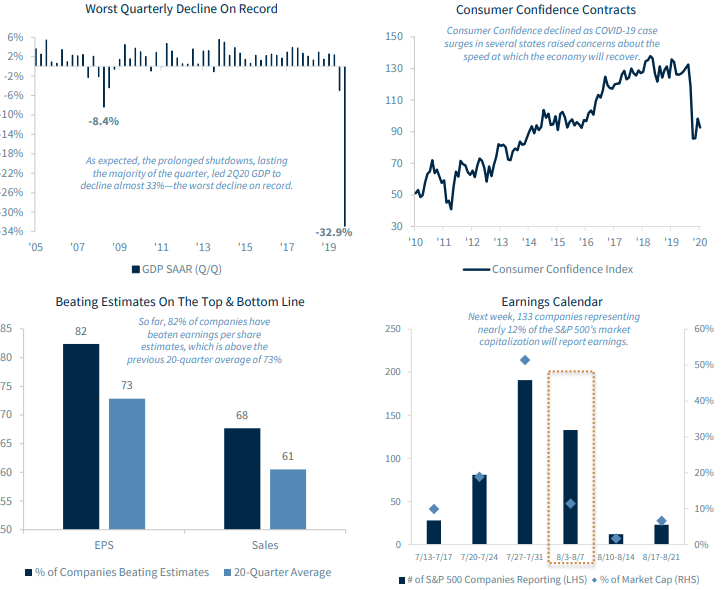

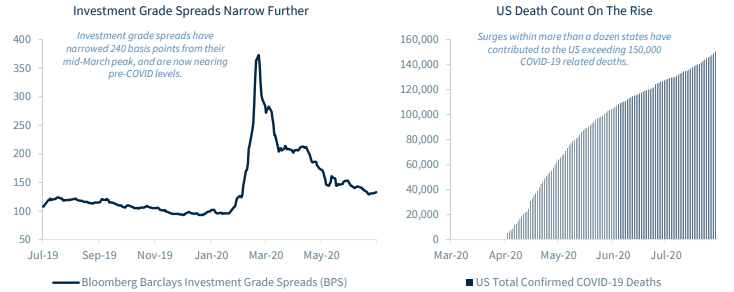

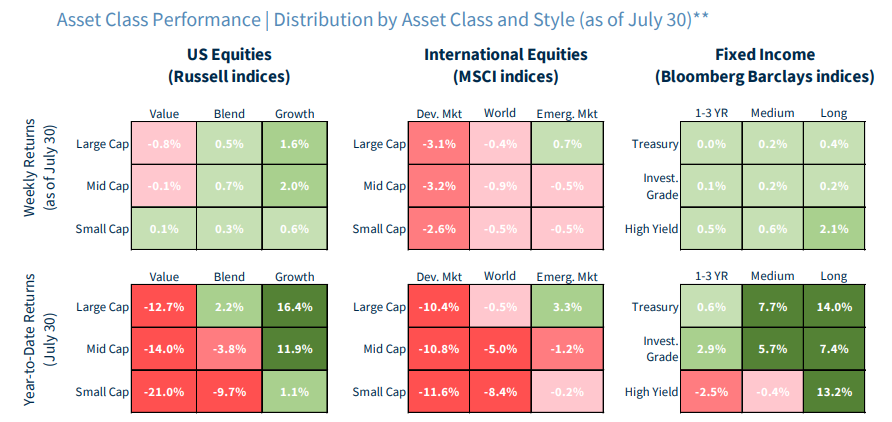

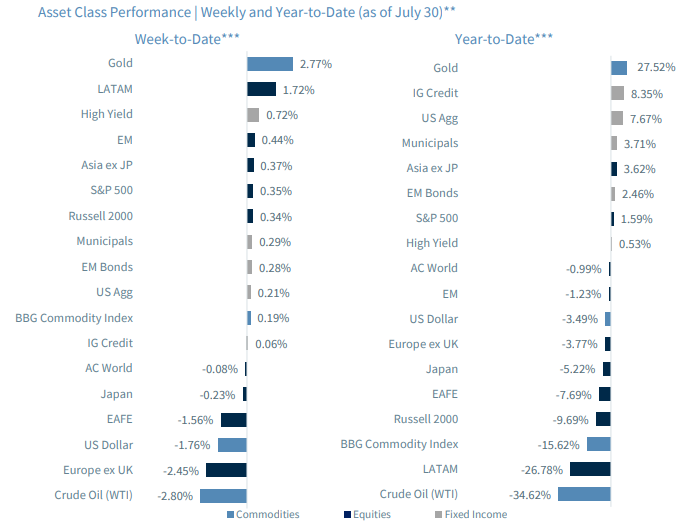

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [53]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)